# Primordial perturbation module

## Inflation and the generation and evolution of primordial fluctuations
## A python notebook of BINGO (https://github.com/dkhaz/bingo)

**Only the power spectrum part is released here. For bispectra, use the fortran version.**
## Dhiraj Kumar Hazra, IMSc, Chennai, India

**Topics of discussion**

1. Horizon problem
2. Solution to horizon problem, inflation
3. Solving Klein-Gordon equations
4. Solving Mukhanov-Sasaki/Curvature perturbation equations
5. Solving the tensor perturbation equation
6. Primordial scalar and tensor power spectra
7. Comparison with slow roll approximation

#### References

* Mukhanov, Feldmann, Brandenberger: https://ui.adsabs.harvard.edu/abs/1992PhR...215..203M/abstract
* Riotto https://arxiv.org/abs/hep-ph/0210162
* Bassett, Tsujikawa, Wands -- https://arxiv.org/abs/astro-ph/0507632
* Sriramkumar https://arxiv.org/abs/0904.4584 (**I will be following the notations, equations and conventions mainly from this review**)
* Baumann: https://arxiv.org/abs/0907.5424


#### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import integrate 
rc('text', usetex=True)
plt.rcParams.update({'font.size': 22})

### Unit convention 

$$M_{PL}=\frac{1}{\sqrt{8\pi G}}$$
$$M_{PL}=c=1$$

We assume a flat $\Lambda$CDM Universe.

### Horizon problem

We had discussed the angle subtended from today to the CMB horizon on the CMB sky in the Ages, Distances and Angles notebook. Here we will plot the Hubble radius from Big Bang till today. 

The Hubble parameter:

$$H(z)={H_0}\left[\frac{\Omega_{\rm r}}{a^4}+\frac{\Omega_{\rm m}}{a^3}+\frac{\Omega_{\rm k}}{a^2}+\Omega_{\Lambda}\right]^{1/2}$$


In [2]:
import constants as const 
import Planckbf as Pl

In [3]:
# Define H(z)
def H(a,Om_m,Om_l,Om_r,H0):
    Om_k=1-Om_m-Om_l-Om_r
    Hz=H0*np.sqrt((Om_m*a)+Om_r+(Om_k*a**2)+Om_l*a**4)/a**2
    return Hz

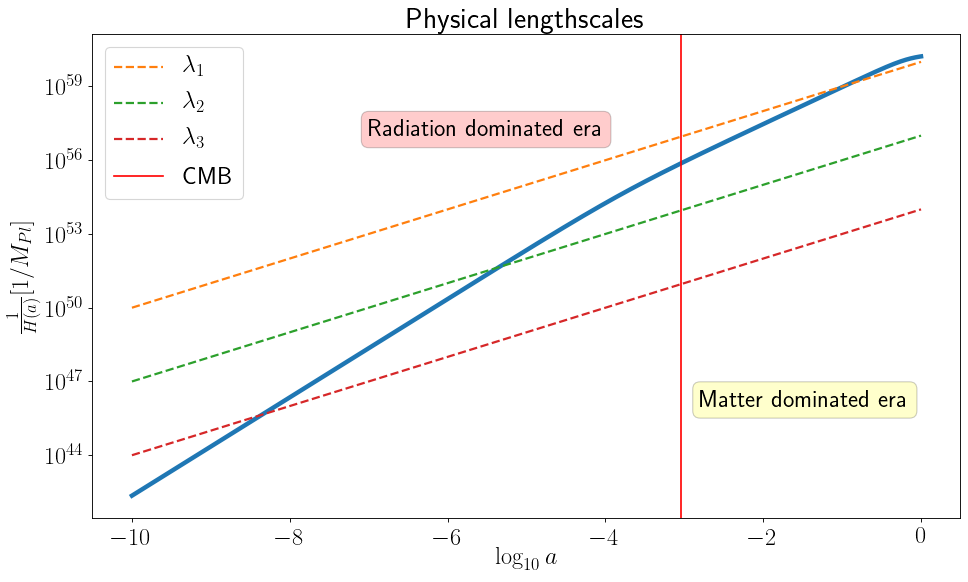

In [4]:
Om_m=Pl.Omega_mB
Om_l=Pl.Omega_lB
Om_r=Pl.Omega_rB
H0=Pl.H0B

a = np.logspace(-10, 0, 1000)
Hz=np.zeros(len(a))
HR=np.zeros(len(a))
#Physical wavelengths
lambda1=10**60*a
lambda2=10**57*a
lambda3=10**54*a

Hz=H(a,Om_m,Om_l,Om_r,H0)*const.Km/const.MPc/const.C/const.mGeVinv/const.MplGeV
# This is converted to seconds^{-1}.
# Changed into units of meter^{-1}
# Changed into units of GeV
# Changed into units of Mpl (reduced Planck mass)
#print(Hz[-1])
# Hubble radius
R_H=1/Hz

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel(r'$\log_{10} a$')
plt.yscale('log')
plt.ylabel(r'$\frac{1}{H(a)} [1/M_{Pl}]$')
plt.plot(np.log10(a),R_H, lw=4)
plt.plot(np.log10(a),lambda1, lw=2,linestyle='--',label=r'$\lambda_1$')
plt.plot(np.log10(a),lambda2, lw=2,linestyle='--',label=r'$\lambda_2$')
plt.plot(np.log10(a),lambda3, lw=2,linestyle='--',label=r'$\lambda_3$')
plt.axvline(np.log10(1/1101), 0, 1, label='CMB',color='red')
plt.text(-7, 10**57, "Radiation dominated era", fontsize = 22, 
         bbox = dict(facecolor = 'red', alpha = 0.2, boxstyle='round'))
plt.text(-2.8, 10**46, "Matter dominated era", fontsize = 22, 
         bbox = dict(facecolor = 'yellow', alpha = 0.2, boxstyle='round'))
plt.title('Physical lengthscales')
plt.legend()
plt.show()

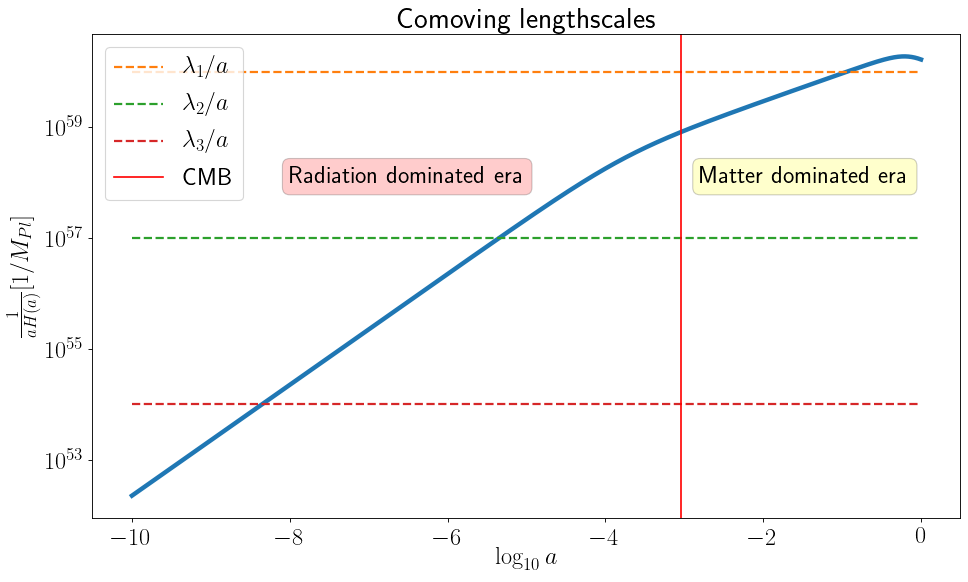

In [5]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel(r'$\log_{10} a$')
plt.yscale('log')
plt.ylabel(r'$\frac{1}{aH(a)} [1/M_{Pl}]$')
plt.plot(np.log10(a),R_H/a, lw=4)
plt.plot(np.log10(a),lambda1/a, lw=2,linestyle='--',label=r'$\lambda_1/a$')
plt.plot(np.log10(a),lambda2/a, lw=2,linestyle='--',label=r'$\lambda_2/a$')
plt.plot(np.log10(a),lambda3/a, lw=2,linestyle='--',label=r'$\lambda_3/a$')
plt.axvline(np.log10(1/1101), 0, 1, label='CMB',color='red')
plt.text(-8, 10**58, "Radiation dominated era", fontsize = 22, 
         bbox = dict(facecolor = 'red', alpha = 0.2, boxstyle='round'))
plt.text(-2.8, 10**58, "Matter dominated era", fontsize = 22, 
         bbox = dict(facecolor = 'yellow', alpha = 0.2, boxstyle='round'))
plt.title('Comoving lengthscales')
plt.legend()
plt.show()

**Therefore modes leave Hubble radius as we go back in time. We need a mechanism that brings all the observable modes inside Hubble radius as we go back in time**

$$-\frac{d}{dt}\left[\frac{\lambda}{H^{-1}}\right]<0$$

Using $\lambda\propto a$ this provides the condition, $$\ddot{a}>0$$

Therefore, we need acceleration. From the dark energy notebook we discussed that scalar field models can provide acceleration. Here, however, we need nearly exponential acceleration that provides 60 _efolds_ of inflation that roughly translates to an enlargement of the scale factor by $10^{26}$. 

This points towards a mechanism where Hubble radius stays nearly constant.

A scalar field slowly rolling down its nearly flat potential can provide such acceleration. Let's examine the Klein-Gordan equation of motion for scalar fields.

### Solution to Klein-Gordan equations

$$\ddot{\phi}+3H\dot{\phi}+\frac{dV}{d\phi}=0$$

overdots are derivatives _w.r.t._ cosmic time. We however, solve the Klein-Gordan equation in _e-folds_.

## Friedmann Equations

1. $$H^2=\left(\frac{\dot a}{a}\right)^2=\frac{8\pi G}{3}\rho $$

2. $$\dot{H}+H^2=\left(\frac{\ddot a}{a}\right)=-\frac{4\pi G}{3}\left(\rho+\frac{3p}{c^2}\right)$$

where, 
$$\rho=\frac{\dot{\phi}^2}{2}+V(\phi)$$
$$p=\frac{\dot{\phi}^2}{2}-V(\phi)$$

In [6]:
def potential(phi,potparams):
    """ Here we define the potential of the scalar field phi
        input value if phi and the return values are v and dvdphi.
        It is best to keep this definition in a separate module.
        Easier to edit if the potential is changed."""
    mass=potparams
    v=0.5*(mass**2)*phi*phi
    dvdphi=mass**2*phi
    return v,dvdphi

**Note two changes in the background equations. I am rewriting the equations in _N_. Also I am replacing $H^2$ from Friedmann equations**

$$N=\int^{t}_{t_i}dt H=\ln\left[\frac{a(t)}{a_i}\right]$$


In [7]:
def background_eqn(t,fields,potparams):
    """ Klein-Gordon equations
        Using the potential, solve for the field evolution. """
    phi,dphidN=fields
    v,dvdphi=potential(phi,potparams)
    d2phidN2=-(3.-0.5*(dphidN*dphidN))*dphidN-(6.-(dphidN*dphidN))*dvdphi/(2.*v)
    return dphidN,d2phidN2

def bgnd_eqn(yB,x,potparams):
#   Same equations as background_eqn
#   Will be used with ODEINT
#   Klein-Gordon equations
#   Using the potential, solve for the field evolution
    VB,V_PHIB=potential(yB[0],potparams)
    return [yB[1],-(3.0-0.5*(yB[1]*yB[1]))*yB[1]-(6.0-(yB[1]*yB[1]))*V_PHIB/(2.0*VB)]



#### Prepare the solver

In [8]:
from scipy.integrate import solve_ivp

# The following wrapper is prepared by Ivan Debono. Useful to check different methods. Terminates the integration at the end of inflation
def solver(t,ph_initial,efolds,potparams,dense_output=True,method='RK45',stop_at_eoi=False):
    """ Calculate the required three quantities: t, \phi, d\phi/dt
        and these quantities at all values of efold input, if required """
   
    #Condition for stopping integration: stop_integration reaches zero
    if(stop_at_eoi):
        stop_integration.terminal=True
        solution = solve_ivp(lambda t,ph_initial: background_eqn(t,ph_initial,potparams),t,ph_initial,
                           method=method,
                           dense_output=dense_output,
                            events=(stop_integration,),
                             vectorized=True, max_step=np.inf)
    else : 
        solution = solve_ivp(lambda t,ph_initial: background_eqn(t,ph_initial,potparams),t,ph_initial,
                           method=method,
                           dense_output=dense_output,
                            vectorized=True, max_step=np.inf)

    t=solution['t']
    phi=solution['y'][0]
    dphi=solution['y'][1]
   
    # If dense_output set to True, we obtain a class that can solve for any value of t
    if dense_output:
        soln=solution['sol'](efolds)
        phi_sol=soln[0]
        dphi_sol=soln[1]   
        return solution,t,phi,dphi,soln,phi_sol,dphi_sol
    else:
        return solution,t,phi,dphi

#### Define parameters and initial condition

Initial field value can be determined analytically. For quadratic model it turns out that $\phi_{ini}\sim 16 M_{Pl}$. Or here too, one can use some value of initial field value and check whether the inflation lasts for about 70 _efolds_. Then one can adjust the initial value. We also sometimes implement a shooting algorithm to determine. 

Notice that we will determine the $\dot{\phi}$ using slow roll initial condition. In slow roll,

$$\ddot{\phi}<<3H\dot{\phi}$$
Therefore,
$$3H\dot{\phi}\simeq-\frac{dV}{d\phi}$$
$$3H^2\phi_N\simeq-\frac{dV}{d\phi}$$
where $\dot{\phi}=H\frac{d\phi}{dN}$ 

In slow roll limit, $$H^2=\frac{V(\phi)}{3}$$ as $$\dot{\phi}^2<<V(\phi)$$

Therefore, $$\phi_N^{\rm initial}=-\left[\frac{V_\phi}{V}\right]_{\rm initial}$$

In [9]:
# For quadratic potential we only need the mass as the parameter
mass= 7e-6 
# This is in Planck mass. 
potparams=mass

# Number of initial conditions for background evolution 
NB=2
ph_initial=np.zeros(NB)
ph_initial[0]=16.5 

# This is also in Planck Mass
# The derivative of the field can be determined using slow-roll condition. 
Vini,dV_ini=potential(ph_initial[0],potparams)
#print(Vini,dV_ini)

ph_initial[1]=-dV_ini/Vini

#print(ph_initial)

#### Define Hubble parameter, in terms of $d\phi/dN$

In [10]:
def Hubble(phi_N,V):
    #print(phi_N,V)
    #print(np.sqrt(V/(3-0.5*(phi_N*phi_N))))
    return np.sqrt(V/(3-0.5*(phi_N*phi_N)))

### Solve Klein-Gordan equation

In [11]:
# note that here t is indeed N
method='RK45'
# or 'LSODA' 'Radau' 'RK23' BDF'
t_start=0
t_end=69
tspan=[t_start,t_end]
#backgroundsolution,t,phi,dphi,soln,phi_sol,dphi_sol=solver(tspan,ph_initial,potparams,dense_output=True,method=method)
efolds=np.arange(0,71,5e-3)
# In some cases, during preheating phase, if smaller stepsize is used the integration can face certain
# problems, mainly when potential becomes 0. 
# In certain cases solving the second order equation for the field and first order equation of Hubble 
# parameter from Friedmann equation can help. In this notebook we are using the expression of H^2 from Friedmann equation
# in the Klein-Gordan equation.
soln_bgnd = integrate.odeint(bgnd_eqn,ph_initial,efolds,args=(potparams,))
phi=soln_bgnd[:,0]
dphi=soln_bgnd[:, 1]
pot,dpotdphi=potential(phi,potparams)
Hub=Hubble(dphi,pot)

### Plot the potential

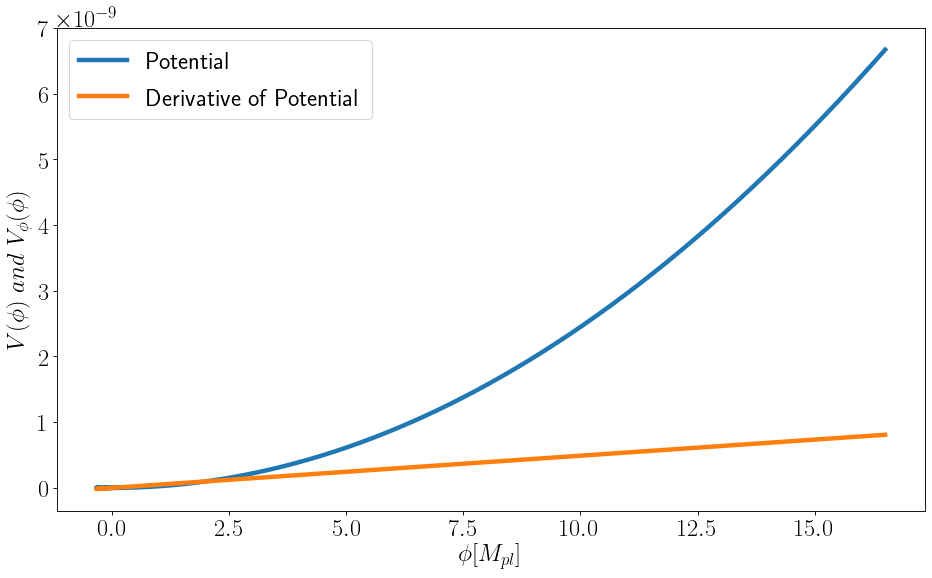

In [12]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel(r'$\phi [M_{pl}]$')
plt.ylabel(r'$V(\phi)~and~V_\phi(\phi)$')
plt.plot(phi,pot, lw=4, label='Potential')
plt.plot(phi,dpotdphi, lw=4,label='Derivative of Potential')
plt.legend()
plt.show()

### Plot the scalar field evolution

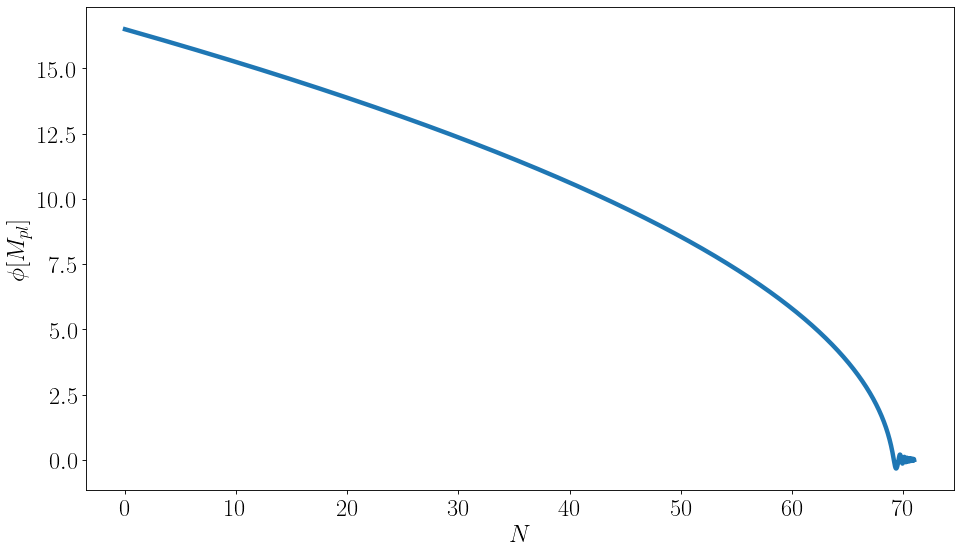

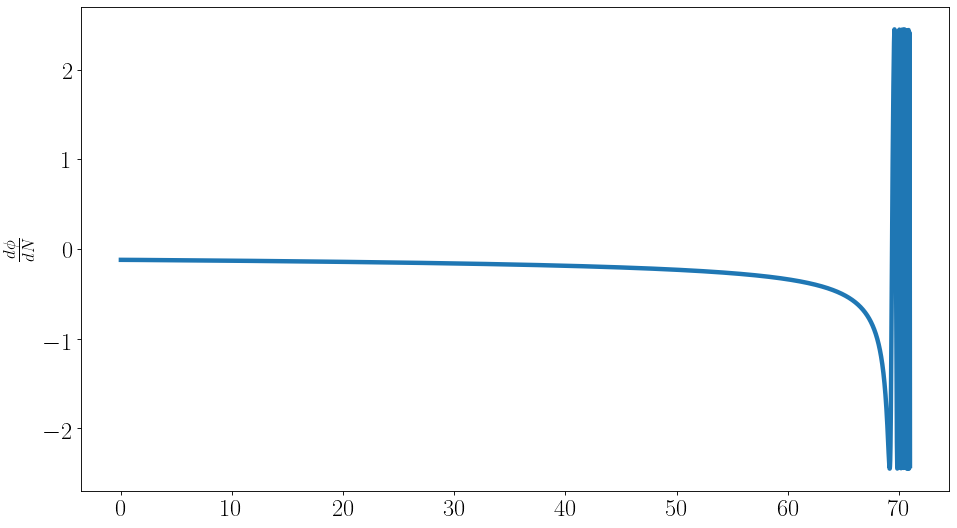

In [13]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel(r'$N$')
plt.ylabel(r'${\phi} [M_{pl}]$')
plt.plot(efolds,phi, lw=4)
plt.show()

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'$\frac{d\phi}{dN}$')
plt.plot(efolds,dphi, lw=4)
plt.show()

**Note the oscillations at the end of inflation. These are the oscillations of the scalar field at the bottom of the potential. This phase is known as preheating**

### Plot the Hubble parameter

Note that it remains nearly constant. This allows the modes to come inside the Hubble radius

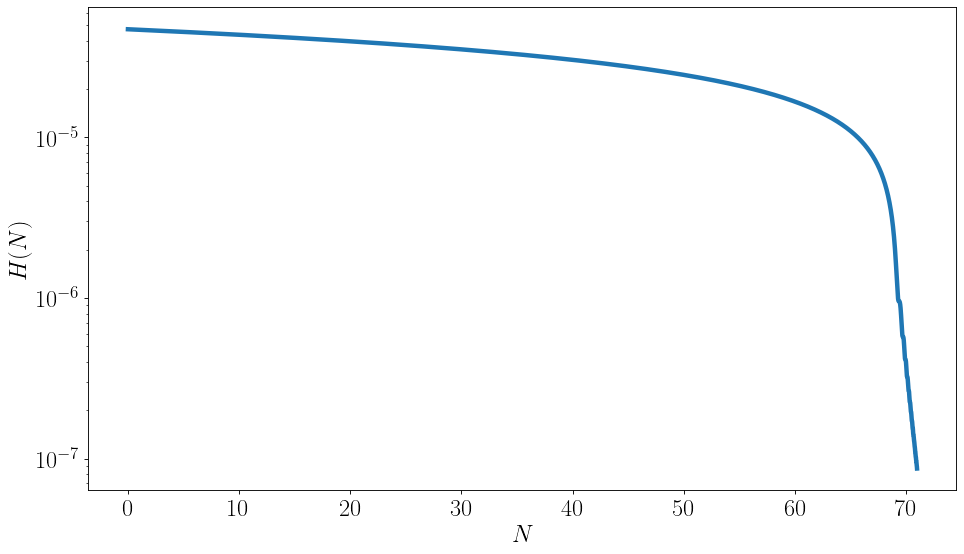

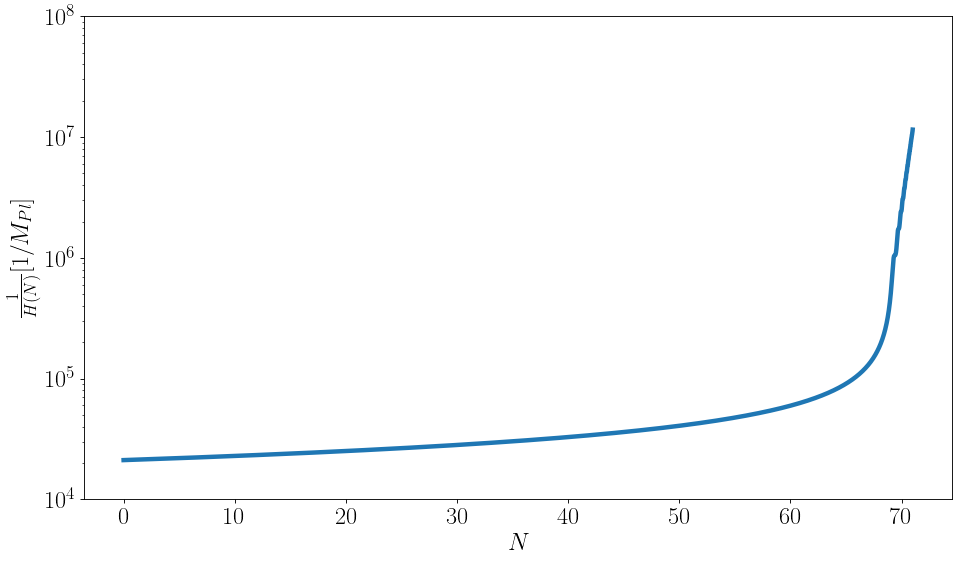

In [14]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.yscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$H(N)$')
plt.plot(efolds,Hub, lw=4)
plt.show()


plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.yscale('log')
plt.xlabel(r'$N$')
plt.ylim([1e4,1e8])
plt.ylabel(r'$\frac{1}{H(N)} [1/M_{Pl}]$')
plt.plot(efolds,1/Hub, lw=4)
plt.show()

**Hubble radius stays nearly constant that allows the modes to come inside the Hubble radius during inflation**

### Joining the evolutions

Here we join the inflationary evolution with the evolution of the Universe in standard Big-Bang cosmology. Note that we have not been able to detect the tensor modes and therefore do not know the energy scale of inflation. Energy scale of inflation is given by the Hubble parameter as you note in the Friedmann equation. Since we are working with quadratic model of the Universe, we are going to join the Hubble radius at the end of inflation that matches the Hubble radius in the radiation dominated era. The definition of the end of inflation will be discussed in the next section. Here we can say we are joining the Hubble radius at the end of evolution (_i.e._ at the last _efold_ in our evolution shown in the plots).

In [15]:
Hend=Hub[-1]
#print(Hend)
# we will find at which _a_  the function _H(a,Om_m,Om_l,Om_r,H0)_ matches with Hend in Mpl.

def HMpl(lna):
    a=np.exp(lna)
    Om_m=Pl.Omega_mB
    Om_l=Pl.Omega_lB
    Om_r=Pl.Omega_rB
    H0=Pl.H0B
    HMpl=H(a,Om_m,Om_l,Om_r,H0)*const.Km/const.MPc/const.C/const.mGeVinv/const.MplGeV
    return HMpl

def HMpldiff(lna):
    HinMpl=HMpl(lna)
    HMpldiff=HinMpl/Hend
    return HMpldiff


#print(HMpldiff(-20))

def solve(lnamin,lnamax):
    thislnamin=lnamin
    thislnamax=lnamax
    thislna=0.5*(thislnamin+thislnamax)
    val=HMpldiff(thislna)    
    #print('thislna',thislna)
    #print(val)
    #print(abs(val))
    while abs(val-1)>1e-3:
        if val<1:
            thislnamax=thislna
            #print('thislnamax',thislnamax)
        else:            
            thislnamin=thislna
            #print('thislnamin',thislnamin)            
        thislna=0.5*(thislnamin+thislnamax)
        val=HMpldiff(thislna)
        #print('thisval',val)

    bestlna=thislna    
    sol=val
    return bestlna,sol
    
transit=solve(-100,0)    

lna_transit=transit[0]
print('Point of transition/joining:',lna_transit)
# This is the point of transition
#print(len(Hub))
lnainf=(efolds-efolds[-1])+lna_transit
#print(lnainf)
numlnapostinf=500
numlna=len(Hub)+numlnapostinf
lnacomplete=np.zeros(numlna)
lnacomplete[0:len(Hub)]=lnainf
lnacomplete[len(Hub):numlna]=np.linspace(lna_transit,0,numlnapostinf)
Hubcomplete=np.zeros(numlna)
Hubcomplete[0:len(Hub)]=Hub

for i in range(len(Hub),numlna):
    Hubcomplete[i]=HMpl(lnacomplete[i])
#print(Hubcomplete)    
#print(t)
#Hubstandard=np.zeros
#Hubcomplete[len(Hub)+1:len(Hubcomplete)]=

Point of transition/joining: -63.658905029296875


### Plot the Hubble radius for the complete evolution of the Universe


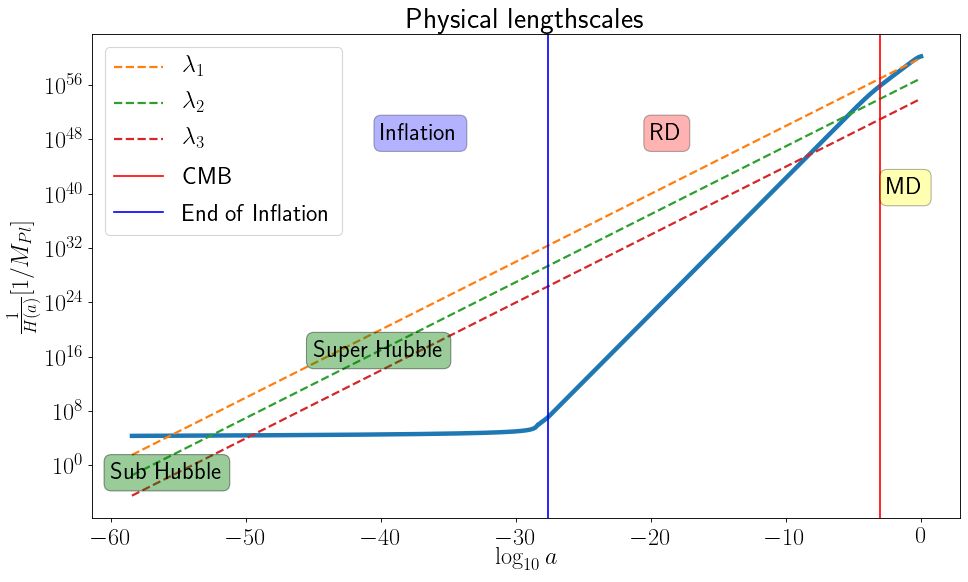

In [16]:
RHfull=1.0/Hubcomplete
#Physical wavelengths that we plotted earlier
lambda1=10**60*np.exp(lnacomplete)
lambda2=10**57*np.exp(lnacomplete)
lambda3=10**54*np.exp(lnacomplete)

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel(r'$\log_{10} a$')
plt.yscale('log')
plt.ylabel(r'$\frac{1}{H(a)} [1/M_{Pl}]$')
plt.plot(np.log10(np.exp(lnacomplete)),RHfull, lw=4)
plt.plot(np.log10(np.exp(lnacomplete)),lambda1, lw=2,linestyle='--',label=r'$\lambda_1$')
plt.plot(np.log10(np.exp(lnacomplete)),lambda2, lw=2,linestyle='--',label=r'$\lambda_2$')
plt.plot(np.log10(np.exp(lnacomplete)),lambda3, lw=2,linestyle='--',label=r'$\lambda_3$')
plt.axvline(np.log10(1/1101), 0, 1, label='CMB',color='red')
plt.axvline(np.log10(np.exp(lna_transit)), 0, 1, label='End of Inflation',color='blue')
plt.text(-20, 10**48, 'RD', fontsize = 22, 
         bbox = dict(facecolor = 'red', alpha = 0.3, boxstyle='round'))
plt.text(-2.5, 10**40, 'MD', fontsize = 22, 
         bbox = dict(facecolor = 'yellow', alpha = 0.3, boxstyle='round'))
plt.text(-40, 10**48, 'Inflation', fontsize = 22, 
         bbox = dict(facecolor = 'blue', alpha = 0.3, boxstyle='round'))
plt.text(-45, 10**16, 'Super Hubble', fontsize = 22, 
         bbox = dict(facecolor = 'green', alpha = 0.4, boxstyle='round'))
plt.text(-60,0.01, 'Sub Hubble', fontsize = 22, 
         bbox = dict(facecolor = 'green', alpha = 0.4, boxstyle='round'))
plt.title('Physical lengthscales')
plt.legend()
plt.show()

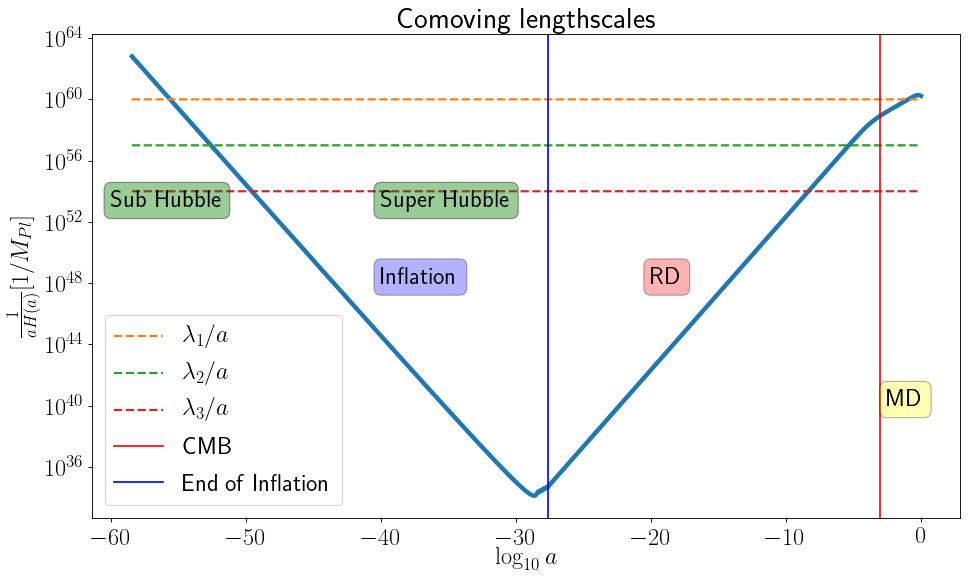

In [17]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel(r'$\log_{10} a$')
plt.yscale('log')
plt.ylabel(r'$\frac{1}{aH(a)} [1/M_{Pl}]$')
plt.plot(np.log10(np.exp(lnacomplete)),RHfull/np.exp(lnacomplete), lw=4)
plt.plot(np.log10(np.exp(lnacomplete)),lambda1/np.exp(lnacomplete), lw=2,linestyle='--',label=r'$\lambda_1/a$')
plt.plot(np.log10(np.exp(lnacomplete)),lambda2/np.exp(lnacomplete), lw=2,linestyle='--',label=r'$\lambda_2/a$')
plt.plot(np.log10(np.exp(lnacomplete)),lambda3/np.exp(lnacomplete), lw=2,linestyle='--',label=r'$\lambda_3/a$')
plt.axvline(np.log10(1/1101), 0, 1, label='CMB',color='red')
plt.axvline(np.log10(np.exp(lna_transit)), 0, 1, label='End of Inflation',color='blue')
plt.text(-20, 10**48, 'RD', fontsize = 22, 
         bbox = dict(facecolor = 'red', alpha = 0.3, boxstyle='round'))
plt.text(-2.5, 10**40, 'MD', fontsize = 22, 
         bbox = dict(facecolor = 'yellow', alpha = 0.3, boxstyle='round'))
plt.text(-40, 10**48, 'Inflation', fontsize = 22, 
         bbox = dict(facecolor = 'blue', alpha = 0.3, boxstyle='round'))
plt.text(-40, 10**53, 'Super Hubble', fontsize = 22, 
         bbox = dict(facecolor = 'green', alpha = 0.4, boxstyle='round'))
plt.text(-60,10**53, 'Sub Hubble', fontsize = 22, 
         bbox = dict(facecolor = 'green', alpha = 0.4, boxstyle='round'))
plt.title('Comoving lengthscales')
plt.legend()
plt.show()

### Define the Hubble slow roll parameter

$$\epsilon_{i+1}=\frac{d\ln\epsilon_i}{dN}$$
$$\epsilon_1=-\frac{\dot{H}}{H^2}=\frac{\phi_N^2}{2}$$

In [18]:
def epsilon1(phi_N):
    return 0.5*phi_N*phi_N

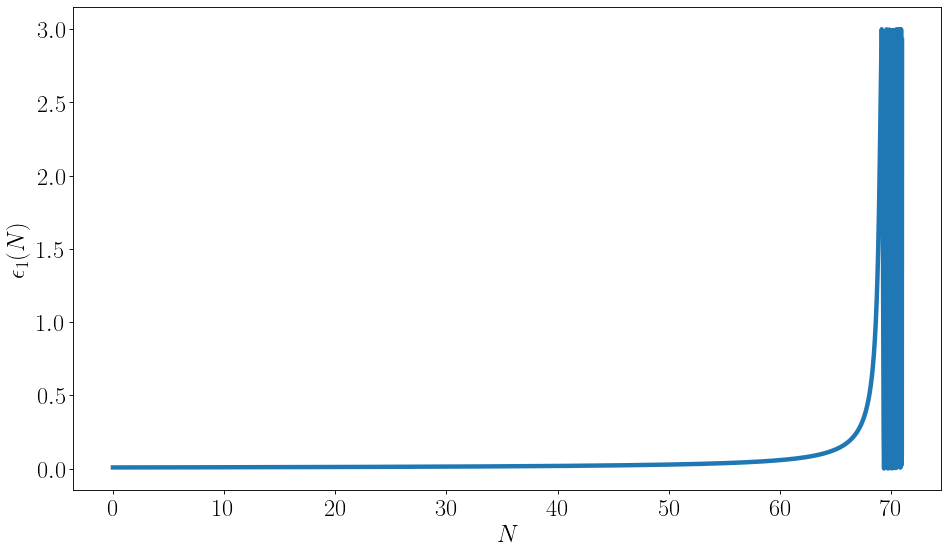

In [19]:
eps1=epsilon1(dphi)

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'$\epsilon_1(N)$')
plt.xlabel(r'$N$')
plt.plot(efolds,eps1, lw=4)
plt.show()

**Note in the plot above that $\epsilon_1$ crosses 1. That is the point we decide to call the _end of inflation_. Now we will get solve the background again till the end of inflation. This will add an automatic termination to the code that will be useful later to define pivot scale exit** 

In [20]:
def stop_integration(t,y):
    return 0.5*(y[1]**2)-1

In [21]:
efolds=np.arange(t_start,t_end,5e-4)
solution,t,phi,dphi,soln,phi_sol,dphi_sol=solver(tspan,ph_initial,efolds,potparams,dense_output=True,method=method,stop_at_eoi=True)
Nend=t[-1]
phiend=phi[-1]
dphiend=dphi[-1]

phi=phi_sol[efolds<Nend]
dphi=dphi_sol[efolds<Nend]
efolds=efolds[efolds<Nend]

pot,dpotdphi=potential(phi,potparams)
Hub=Hubble(dphi,pot)
print('Inflation ended at e-fold:',Nend)
#print(len(efolds))


Inflation ended at e-fold: 68.63295667489584


### Let's plot $\epsilon_1$ to understand whether the inflation indeed ended at Nend

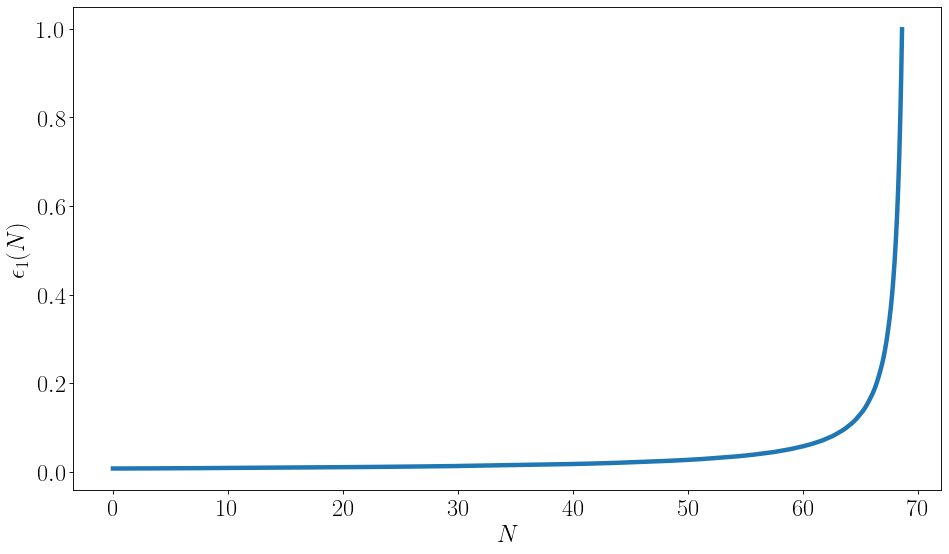

Epsilon value at the end of inflation 0.9992700619594649


In [22]:
eps1=epsilon1(dphi)

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'$\epsilon_1(N)$')
plt.xlabel(r'$N$')
plt.plot(efolds,eps1, lw=4)
plt.show()
print('Epsilon value at the end of inflation',0.5*dphi[-1]*dphi[-1])

**So it works**

Next we need to fix the initial scale factor. The initial scale factor is fixed by demanding a certain mode (pivot mode) leaves the Hubble scale at a particular time during the evolution.

We will impose 0.05 $Mpc^{-1}$ mode leaves the Hubble radius 50 _efolds_ before the end of inflation.

$$0.05=a[N=(N_{end}-50)]H[N=(N_{end}-50)]$$
$$0.05=a_i e^{N=(N_{end}-50)}H[N=(N_{end}-50)]$$

In [23]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx,array[idx]

kpivot=0.05

Ne50_element,Ne50=find_nearest(efolds,Nend-50)
ai=kpivot/(np.exp(Ne50)*Hub[Ne50_element])

In [24]:
print('50 e-folds before inflation is at',Ne50_element,'with value',Ne50,efolds[Ne50_element])
print('Initial scale factor is calculated to be:',ai)

50 e-folds before inflation is at 37266 with value 18.633 18.633
Initial scale factor is calculated to be: 1.0040567334005537e-05


## We will now prepare the curvature perturbation equations

* Metric 

Perturbations in the FLRW metric:

$$ ds^{2}=(1+2{\color{red}A})dt^{2}-2a(\partial_{i}{\color{red}B}+{\color{green}S_{i}})dt dx^{i}-a^{2}(t)[(1-2{\color{red}\Psi})\delta_{ij}+2\partial_{i}\partial_{j}{\color{red}E}+(\partial_{i}{\color{green}F_{j}}+\partial_{j}{\color{green}F_{i}})+{\color{olive}h_{ij}}]dx^{i}dx^{j}
$$

Scalar, vector and tensor perturbations are marked in different colors and they can be identified with the indices. Due to the symmetric metric and the coordinate transformation freedom we have 2 scalar, 2 vector and 2 tensor degress of freedom. We will discuss scalar and tensor perurbations here. Note that in the absence of vector sources, vector perturbations are not generated.

Perturbed Einstein tensor computed from the metric:

 $$\delta G^{0}_{0}=-6H(HA+\dot{\Psi})+\frac{2}{a^{2}}\nabla^{2}\Psi$$


  $$\delta G^{0}_{i}=-2\partial_{i}(HA+\dot{\Psi})$$
 
  $$\delta G^{i}_{j}=-[2(\ddot{\Psi}+3H\dot{\Psi}+H\dot{A})+(2\dot{H}+3H^{2})A+(1/a^{2})\nabla^{2}(A-\Psi)]\delta^{i}_{j}+(1/a^{2})\partial^{i}\partial_{j}(A-\Psi)$$

  $$\delta T^{0}_{0}=\delta\rho, \delta T^{0}_{i}=\partial_{i}\delta q, \delta T^{i}_{j}=-\delta p\delta^{i}_{j},\mathrm{(No~anisotropic~stress)}$$

* Bardeen equation

In the absence of anisotropic stress,

$$A=\Psi=\Phi$$

The single equation for $\Phi$, the Bardeen equation can be expressed as:

$${\Phi''+3 {\cal H} \left(1+C_{_{\rm A}}^2\right) \Phi'-C_{_{\rm A}}^2 \nabla^{2}\Phi+ \left[2 {\cal H}'+ \left(1+3 C_{_{\rm A}}^2\right) {\cal H}^2\right] \Phi = \left(1-C_{_{\rm A}}^2\right)\nabla^{2}\Phi}$$

Here, $$C_{_{\rm A}}^2=p'/\rho', {\cal H}=a'/a$$

* Curvature perturbation 

Define curvature perturbation,  $$\cal{R}=-\frac{1}{\cal{H}^{2}-\cal{H}'}[\cal{H}\Phi'+(2\cal{H}^{2}-\cal{H}')\Phi]$$

According to Bardeen equation, in the Fourier space, we obtain,

$$\cal{R}_k'=-\frac{\cal{H}}{\cal{H}^{2}-\cal{H}'}[(4\pi Ga^{2})\delta p_{NA}-C_{A}^{2}k^{2}\Phi]$$

$\delta p_{NA}$ is the non-adiabatic pressure perturbation. 

In the absence of non-adiabatic pressure perturbations, at super-Hubble scales (when $k/{\cal H}\to 0$), we find,

$$\cal{R}_k'\to 0$$

Therefore, curvature perturbation ${\cal R}_k$ becomes a constant quantity at the super Hubble scales. We will compute these quantities and explicitly check that.

* Equation for curvature perturbation

Using the equations above, we can arrive at the equation for curvature perturbations:

$${\cal R}_k''+2\frac{z'}{z}{\cal R}_k'+k^2{\cal R}_k=0$$

Here, $$z=\frac{a\dot{\phi}}{H}=a\phi_N$$

* Mukhanov-Sasaki variable

Define, $$v=Rz$$

The curvture perturbation equation can now be written as Mukhanov-Sasaki equation.

* Mukhanov-Sasaki equation

$$v''_k+\left[k^2-\frac{z''}{z}\right]v_k=0$$ 

We will compute the solutions for curvature perturbation equations here. Note however, the solution will be equivalent to solving the Mukhanov-Sasaki equation.

* Tensor perturbations

For tensors (with the perturbation amplitude $h$ corresponding to $h_{ij}$), we can write the tensor perturbation equations as:

$$h''+2{\cal H}h'-\nabla^2h=0$$

Note that here, instead of $z'/z$ in perturbation equation for scalars, ${\cal H}=a'/a$ is appears. 

Define, $u=ha$ we can write the equation for the Fourier modes as:

$$u_k''-\left[k^2-\frac{a''}{a}\right]u_k=0$$



In [25]:
# define z
def z(ascale,phi_N):
    return ascale*phi_N

# define perturbation equations
def pert_eqn(ydydx,t,k):
    """ Klein-Gordon equations and the Curvature perturbation equations. 
    Note that R is a complex quantity. Therefore we will have 4 perturbation equations"""   
    phi,dphidN,Rk_re,Rk_re_N,Rk_im,Rk_im_N,hk_re,hk_re_N,hk_im,hk_im_N=ydydx
    v,dvdphi=potential(phi,potparams)
    d2phidN2=-(3.-0.5*(dphidN*dphidN))*dphidN-(6.-(dphidN*dphidN))*dvdphi/(2.*v)
    a=ai*np.exp(t)
    H=np.sqrt(v/(3-0.5*(dphidN*dphidN)))
    #Hubble(dphidN,v)
    zN=a*(dphidN+d2phidN2)

    Rk_re_NN=-(1-(dphidN**2)*0.5+2.0*(zN/z(a,dphidN)))*Rk_re_N-((k/(a*H))**2)*Rk_re
    Rk_im_NN=-(1-(dphidN**2)*0.5+2.0*(zN/z(a,dphidN)))*Rk_im_N-((k/(a*H))**2)*Rk_im

    hk_re_NN=-(3-(dphidN**2)*0.5)*hk_re_N-((k/(a*H))**2)*hk_re
    hk_im_NN=-(3-(dphidN**2)*0.5)*hk_im_N-((k/(a*H))**2)*hk_im

    return [dphidN,d2phidN2,Rk_re_N,Rk_re_NN,Rk_im_N,Rk_im_NN,hk_re_N,hk_re_NN,hk_im_N,hk_im_NN]


### Boundary conditions

Defining the beginning and the end of the perturbation evolution for each mode. Bunch Davies initial condition (will be discussed in the next text cell) is imposed for a mode at a time when $$k=100 a H$$

Actually for any time when $k>> a H $ the condition ensures that the modes are deep inside the Hubble radius. The value 100 is just a choice. A higher value will definitely be more accurate for integration.  


We evolve the modes till super Hubble scales. When $$k=10^{-5} aH$$. There we know for single canonical scalar fields, the curvature perturbation freezes. 

In [26]:
Nic_cond=100
Nshs_cond=1e-5

def boundary(k,t,aH,Nic_cond,Nshs_cond):
    ic_diff=k-Nic_cond*aH
    shs_diff=k-Nshs_cond*aH
    idx_ic,ah_ic=find_nearest(ic_diff,0)
    idx_shs,ah_shs=find_nearest(shs_diff,0)
    Nic=t[idx_ic]
    Nshs=t[idx_shs]
    return idx_ic,Nic,Nshs

#### Select one mode

We will compute the evolution of curvature perturbation for one mode to begin with

In [27]:
# lets fix the pivot scale to be that mode
k=0.05

# lets get the boundary values

idx_ic,Nic,Nshs=boundary(k,efolds,ai*np.exp(efolds)*Hub,Nic_cond,Nshs_cond)
print('Boundary conditions: E-fold initial',Nic,'e-fold super Hubble scale:',Nshs)
print('k/aH=',k/(ai*np.exp(efolds[idx_ic])*Hub[idx_ic]))

Boundary conditions: E-fold initial 13.983 e-fold super Hubble scale: 30.279
k/aH= 100.02047667360765


### Bunch Davies vacuum initial conditions

The Mukhanov-Sasaki equation reads as:
 
$$v''_k+\left[k^2-\frac{z''}{z}\right]v_k=0$$ 

for $k>>aH$ we can neglect the second term (not always true if we have initial fast roll). In such a case 

$$\lim_{k/{\cal H} \to \infty}v_k(\eta)\to (1/\sqrt{2k})e^{-i k\eta}$$

where ${\cal H}=a'/a$

We impose the initial condition on curvature perturbations ${\cal R}_k$. Therefore we have to take into account the relation $v_k={\cal R}_k z$  

For tensor modes, the initial condition on $u_k$ is found to be the same as for $v_k$:

$$\lim_{k/{\cal H} \to \infty}u_k(\eta)\to (1/\sqrt{2k})e^{-i k\eta}$$


In [28]:
# Initial Conditions go here
def initial_condition(idx_ic,k):
    phi_ic=phi[idx_ic]
    phiN_ic=dphi[idx_ic]
    fields_ic=phi_ic,phiN_ic
    a_ic=ai*np.exp(efolds[idx_ic])
    z_ic=z(a_ic,phiN_ic)
    H_ic=Hub[idx_ic]
    dummy_ic,phiNN_ic=background_eqn(efolds[idx_ic],fields_ic,potparams)
    Rk_re_ic=(1/(np.sqrt(2*k)))/z_ic
    Rk_im_ic=0
    Rk_re_N_ic=-Rk_re_ic*((phiNN_ic/phiN_ic)+1)
    Rk_im_N_ic=-np.sqrt(k/2)/(a_ic*H_ic*z_ic)
    hk_re_ic=(1/(np.sqrt(2*k)))/a_ic
    hk_im_ic=0
    hk_re_N_ic=-hk_re_ic
    hk_im_N_ic=-np.sqrt(k/2)/(a_ic*H_ic*a_ic)      
    #print('Initial conditions: phi, phi_N, Rk, Rk',phi_ic,phiN_ic,Rk_re_ic,Rk_re_N_ic,Rk_im_ic,Rk_im_N_ic)
    dydx_ic=[phi_ic,phiN_ic,Rk_re_ic,Rk_re_N_ic,Rk_im_ic,Rk_im_N_ic,hk_re_ic,hk_re_N_ic,hk_im_ic,hk_im_N_ic]
    return dydx_ic
print('Initial conditions: phi, phi_N, Rk, Rk',initial_condition(idx_ic,k))

Initial conditions: phi, phi_N, Rk, Rk [14.712799046582196, -0.13548724805769202, -1.9660908628824874, 1.985569762504961, 0, 196.64934528913096, 0.2663802404433213, -0.2663802404433213, 0, -26.64347862557122]


In [29]:
efolds_pert=np.arange(Nic,Nshs,0.01)

## Solve the curvature perturbation equation

For the mode $k=0.05 Mpc^{-1}$ we evolve the perturbation equations from Nic to Nshs. The initial conditions are imposed at N=Nic

In [30]:
from scipy import integrate
pert_ic=initial_condition(idx_ic,k)
soln_pert=integrate.odeint(pert_eqn,pert_ic,efolds_pert,args=(k,))

### Plot the mode evolution

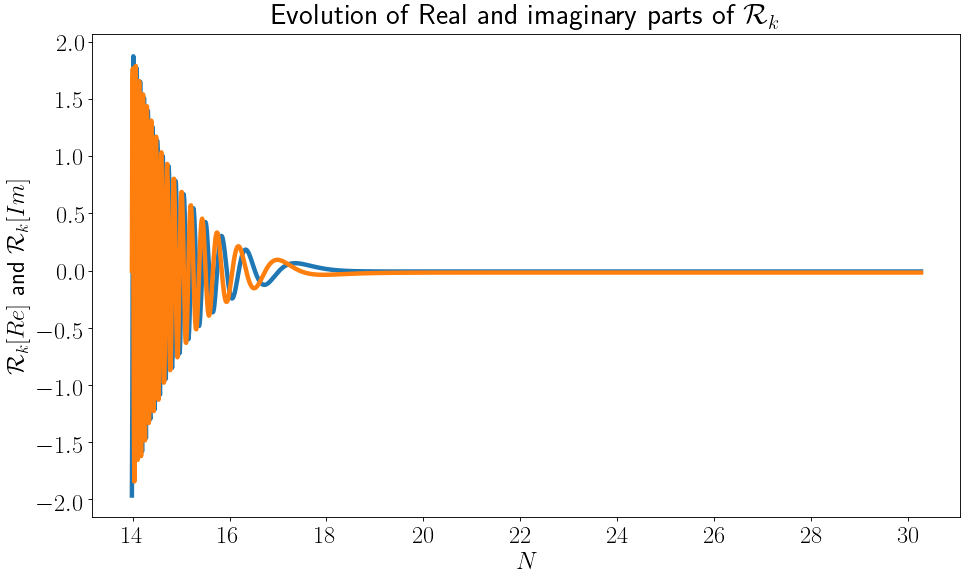

In [31]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'${\cal R}_k[Re]$ and ${\cal R}_k[Im]$')
plt.xlabel(r'$N$')
plt.title(r'Evolution of Real and imaginary parts of ${\cal R}_k$')
plt.plot(efolds_pert, soln_pert[:,2], lw=4)
plt.plot(efolds_pert, soln_pert[:,4], lw=4)
plt.show()


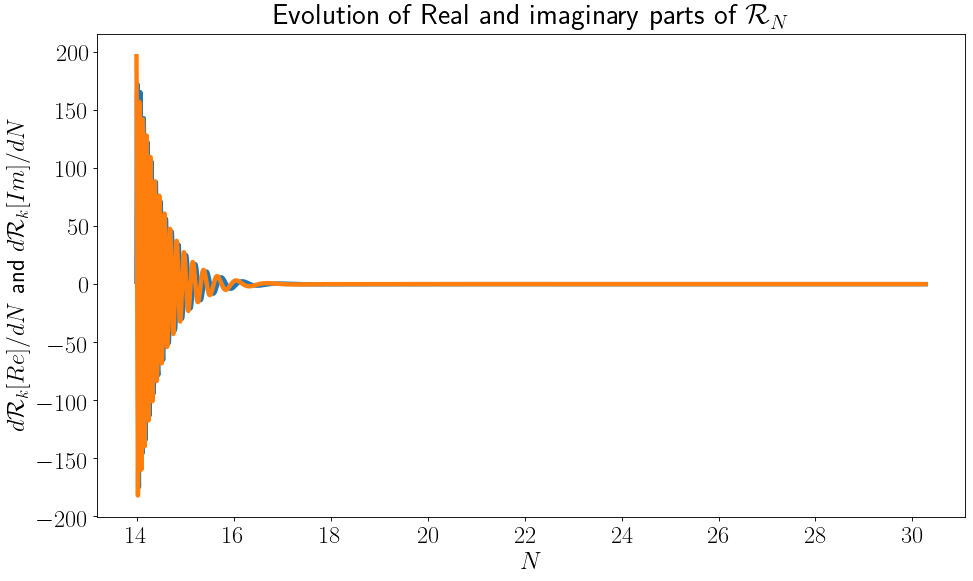

In [32]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'$d{\cal R}_k[Re]/dN$ and $d{\cal R}_k[Im]/dN$')
plt.xlabel(r'$N$')
plt.title(r'Evolution of Real and imaginary parts of ${\cal R}_N$')
plt.plot(efolds_pert, soln_pert[:,3], lw=4)
plt.plot(efolds_pert, soln_pert[:,5], lw=4)
plt.show()

### To show that the ${\cal R}'$ indeed goes to 0 and ${\cal R}$ remains a conserved quantity at the super Hubble scales/


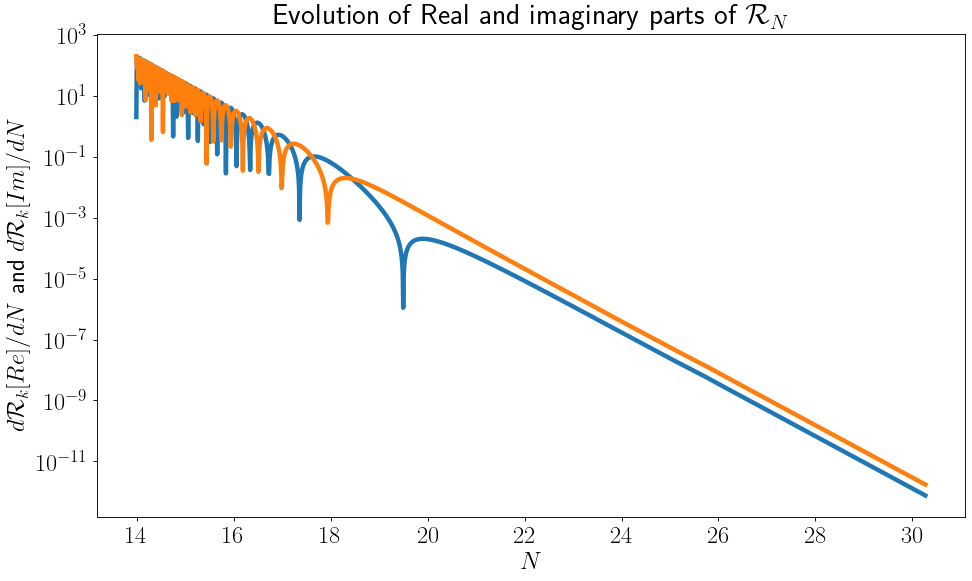

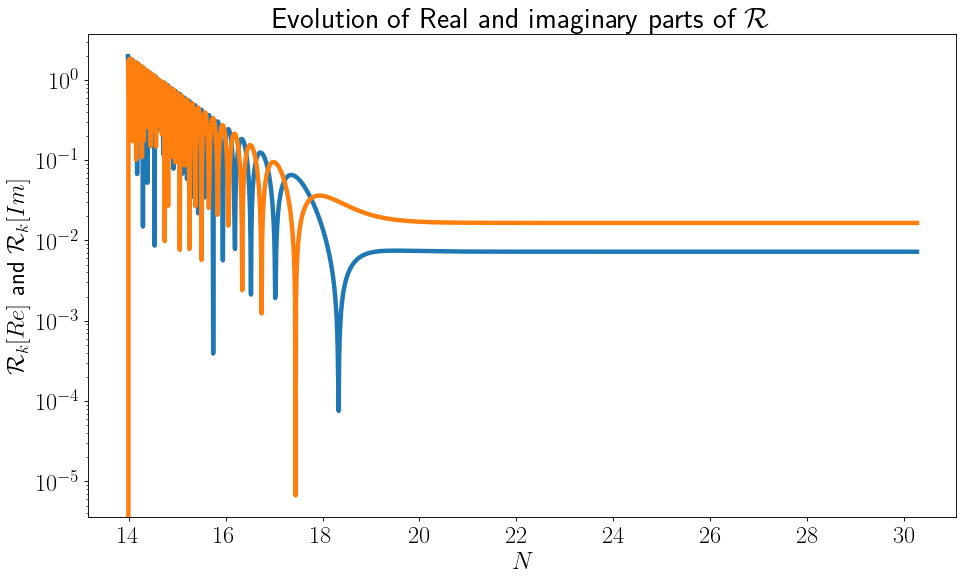

In [33]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'$d{\cal R}_k[Re]/dN$ and $d{\cal R}_k[Im]/dN$')
plt.yscale('log')
plt.xlabel(r'$N$')
plt.title(r'Evolution of Real and imaginary parts of ${\cal R}_N$')
plt.plot(efolds_pert, abs(soln_pert[:,3]), lw=4)
plt.plot(efolds_pert, abs(soln_pert[:,5]), lw=4)
plt.show()
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'${\cal R}_k[Re]$ and ${\cal R}_k[Im]$')
plt.yscale('log')
plt.xlabel(r'$N$')
plt.title(r'Evolution of Real and imaginary parts of ${\cal R}$')
plt.plot(efolds_pert, abs(soln_pert[:,2]), lw=4)
plt.plot(efolds_pert, abs(soln_pert[:,4]), lw=4)
plt.show()

## Definition of the primordial power spectrum

In terms of curvature perturbations and Mukhanov-Sasaki variables, the primordial scalar and tensor power spectra are defined as follows:

$${\cal P}_S(k)=\frac{k^3}{2\pi^2}|{\cal R}_k|^2=\frac{k^3}{2\pi^2}\left(|{v}_k|/z\right)^2$$

$${\cal P}_T(k)=8\frac{k^3}{2\pi^2}|{\cal h}_k|^2=\frac{k^3}{2\pi^2}\left(|{u}_k|/a\right)^2$$


In principle, primordial power spectrum should be calculated at the end of inflation. However, since the curvature perturvation ${\cal R}_k$ ($h_k$ too) freezes at the super Hubble scales, it is sufficient to calculate the power spectrum for the modes when they are at super Hubble scales.

In [34]:
def Psk(kk,Rk,hk):
    Rk_re,Rk_Im=Rk
    hk_re,hk_Im=hk    
    return kk**3/(2e0*np.pi**2)*((Rk_re*Rk_re)+(Rk_Im*Rk_Im)),4*2*kk**3/(2e0*np.pi**2)*((hk_re*hk_re)+(hk_Im*hk_Im))

In [35]:
# Last elements of R and h
Rk=[soln_pert[-1,2],soln_pert[-1,4]]
hk=[soln_pert[-1,6],soln_pert[-1,8]]

In [36]:
PPS_Scalar,PPS_Tensor=Psk(k,Rk,hk)
print('The primordial scalar and tensor power spectrum calculated at mode',k,'are:',PPS_Scalar,PPS_Tensor)
print('The tensor to scalar ratio calculated at mode',k,'are:',PPS_Tensor/PPS_Scalar)

The primordial scalar and tensor power spectrum calculated at mode 0.05 are: 2.06574165313856e-09 3.2685509096731586e-10
The tensor to scalar ratio calculated at mode 0.05 are: 0.15822650933659224


**Note that at this pivot scale this amplitude of the primordial scalar power specrtrum is consistent with the angular power spectrum obtained from the Cosmic Microwave Background observation. However the tensor to scalar ratio is not consistent as the Planck+BK15 fids $r<0.056$ at 95% CL.**

## Calculate the primordial power spectrum for a range of modes

We will calculate the primordial power spectrum for few k values between $10^{-4}-1 Mpc^{-1}$

In [37]:
# lets define a function that will take only k as input and return primordial power spectra
# note that we need the background computed apriori

def computePPS(kk,atol=1e-8):
    idx_ic,Nic,Nshs=boundary(kk,efolds,ai*np.exp(efolds)*Hub,Nic_cond,Nshs_cond)
    efolds_pert=np.arange(Nic,Nshs,0.01)
    #print(kk,Nic,Nshs)
    pert_ic=initial_condition(idx_ic,kk)
    #print(kk,idx_ic,Nic,Nshs,pert_ic)
    sol_pert=integrate.odeint(pert_eqn,pert_ic,efolds_pert,args=(kk,),atol=atol)
    Rkshs=[sol_pert[-1,2],sol_pert[-1,4]]
    hkshs=[sol_pert[-1,6],sol_pert[-1,8]]
    PSval=Psk(kk,Rkshs,hkshs) 
    return PSval

In [38]:
numK=500
karray=np.logspace(-4, 0, numK)
PS=np.zeros(numK)
PT=np.zeros(numK)
#print(k)
kk=2
print('The primordial power spectrum calculated at mode',kk,'MPc^{-1} is:',computePPS(kk,1e-10))

The primordial power spectrum calculated at mode 2 MPc^{-1} is: (1.769978795120715e-09, 3.022577094312378e-10)


In [39]:
import time
pert_start_time=time.process_time()
for i in range(len(karray)):
    k=karray[i]
    PS[i],PT[i]=computePPS(k) 
    
pert_end_time=time.process_time()

### Plot the primordial power spectrum 

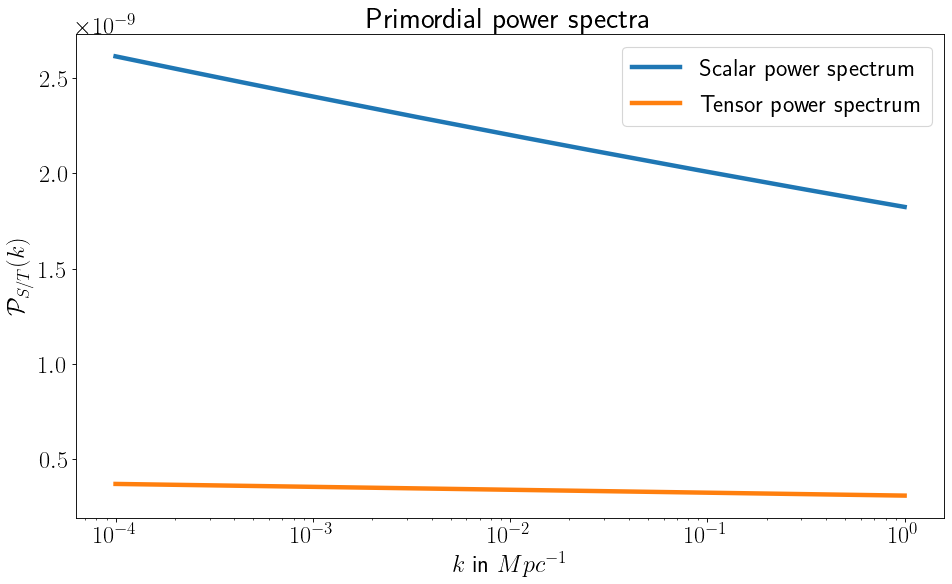

In [40]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'${\cal P}_{S/T}(k)$')
plt.xscale('log')
plt.xlabel(r'$k$ in $Mpc^{-1}$')
plt.title(r'Primordial power spectra')
plt.plot(karray,PS, lw=4,label='Scalar power spectrum')
plt.plot(karray,PT, lw=4,label='Tensor power spectrum')
plt.legend()
plt.show()

## Comparison
**Notice that the power spectrum is nearly scale invariant**

For a slow roll it can be shown that:

$${\cal P}_S(k)=\left[\frac{H^2}{2\pi\dot{\phi}}\right]^2$$

Therefore from the plots of the background evolution too we can understand the power spectrum will be nearly scale invariant.

**Then why are we solving the perturbations ?**

For the departures from slow-roll the analytical approximation does not work. Use some potential that allows departures from slow roll. For example, try https://inspirehep.net/literature/343958

The analytical form of primordial power spectrum that is nearly scale invariant. 

$${\cal P}_S(k)=A_S \left[\frac{k}{k_0}\right]^{n_s-1}$$

$k_0$ is the pivot scale where ${\cal P}_S(k)=A_S$, $n_s$ is the tilt or the spectral index. 

**Planck best fit values**

$$A_S=2.1\times 10^{-9}, n_s=0.966$$


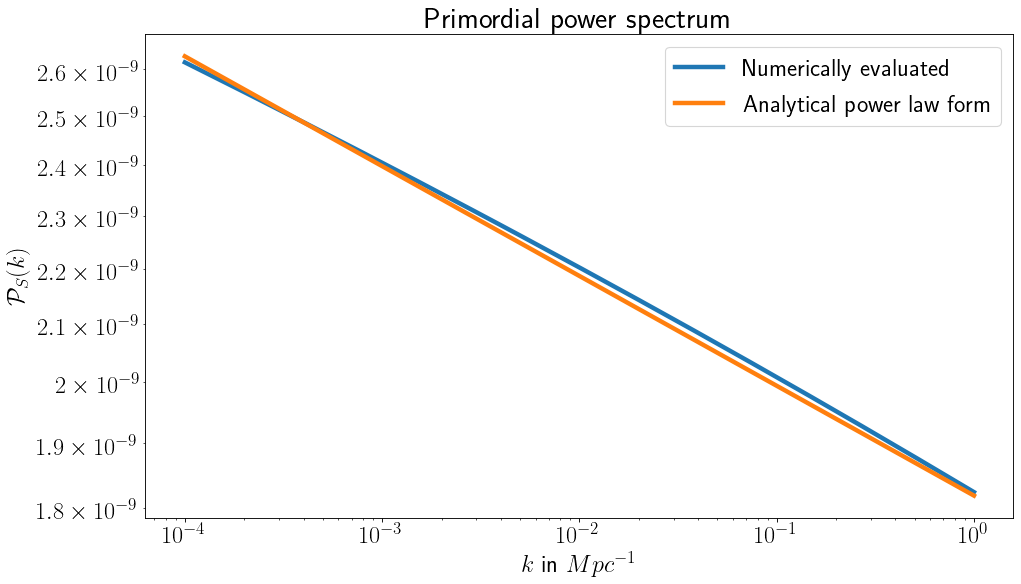

In [41]:
# The analytical power spectrum

PSA=np.zeros(numK)
PSA=2.05e-9*(karray/0.05)**(0.96-1)
# Here I have changed the values of A_S and n_s a little from their best fit to match the amplitude near the pivot scale
# Notice that if you want to compare the potential with the data, you have vary the potential parameters (here only one, mass)
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'${\cal P}_S(k)$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ in $Mpc^{-1}$')
plt.title(r'Primordial power spectrum')
plt.plot(karray,PS, lw=4,label='Numerically evaluated')
plt.plot(karray,PSA, lw=4,label='Analytical power law form')
plt.legend()
plt.show()

#### Lets check the time taken by this code to calculate the power spectra for 500 modes

In [42]:
print('Python version of BINGO power spectrum took',pert_end_time-pert_start_time,'seconds')

Python version of BINGO power spectrum took 125.012324 seconds


**Fortran version of BINGO takes a 1-2 seconds for nearly 2000-3000 modes. That is why for model comparison you should use the fortran version of BINGO**

### What is the spectral tilt here ?

The spectral tilt is defined as: 

$$n_s=1+\frac{d\ln {\cal P}_S}{d\ln k}$$

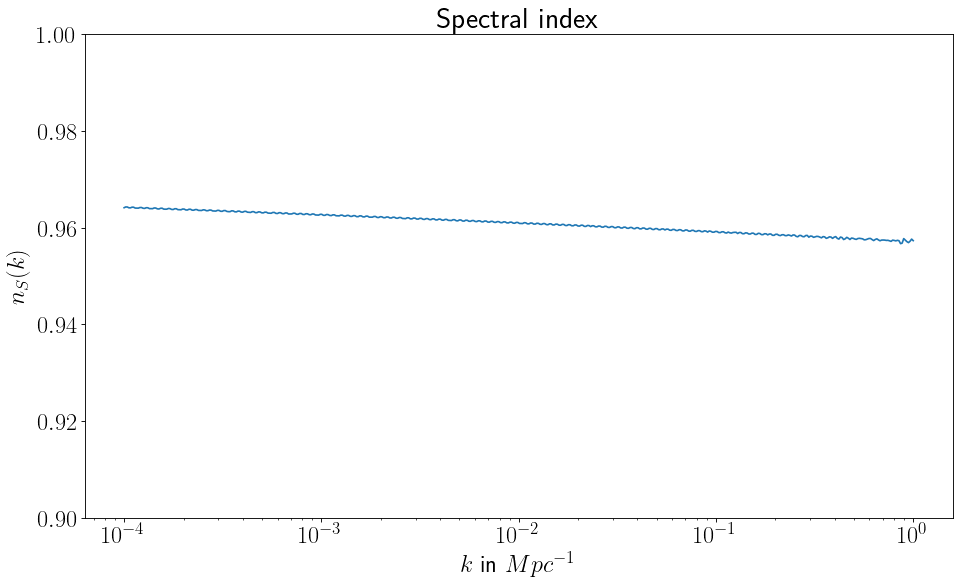

In [43]:
lnk=np.log(karray)
dlnk=lnk[1]-lnk[0]
lnPk=np.log(PS)
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'$n_S(k)$')
plt.xscale('log')
plt.xlabel(r'$k$ in $Mpc^{-1}$')
plt.title(r'Spectral index')
plt.ylim([0.9,1])
plt.plot(karray,1+np.gradient(lnPk, dlnk),label='n_s')
plt.show()

**Why do we get these tiny fluctuations in the plot above?**

Because there are numerical inaccuracies in calculating

1. the primordial power spectrum. 
2. the gradient 

They both can be improved with increasing accuracies and samples in k-space

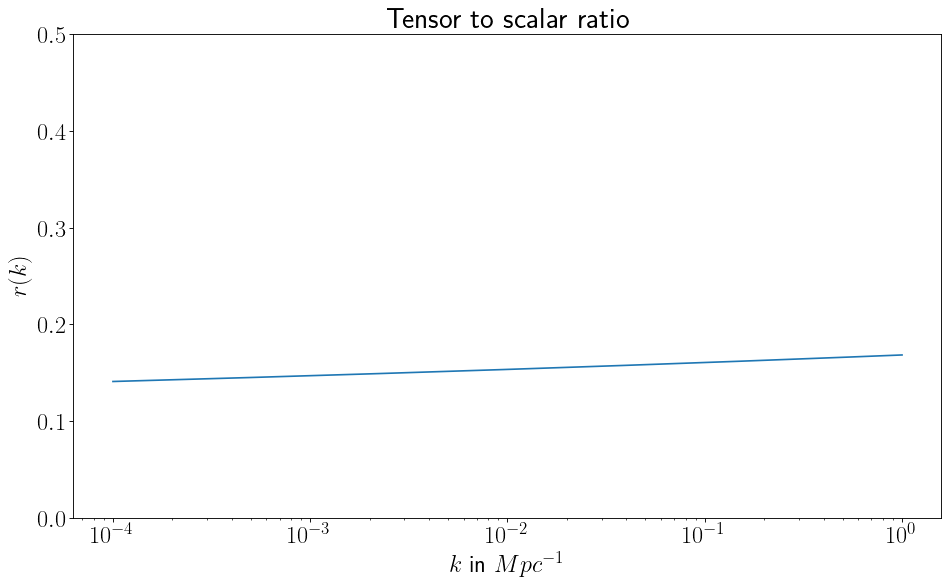

In [44]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'$r(k)$')
plt.xscale('log')
plt.xlabel(r'$k$ in $Mpc^{-1}$')
plt.title(r'Tensor to scalar ratio')
plt.ylim([0,0.5])
plt.plot(karray,PT/PS,label='r')
plt.show()

## Comparison with slow roll approximation
In the slow roll approximation the primordial power spectra can be expressed as,

$${\cal P}^\mathrm{slow-roll}_{S}(k)=\left[\frac{H^2}{2\pi \dot{\phi}}\right]^2_{k=aH}=\left[\frac{H}{2\pi\phi_N} \right]^2_{k=aH}$$

and 

$${\cal P}^\mathrm{slow-roll}_{T}(k)=\frac{8}{M_p^2}\left[\frac{H}{2\pi} \right]^2_{k=aH}$$


Note that these expressions are evaluated at the Hubble exit. We need to find the epoch of Hubble exit for each modes. Here we will compute the spectrum from large scale to a very small cosmological scales that left the Hubble radius at around $\phi=\phi_{initial}$ and $\phi=\phi_{Nend}$.

In [45]:
# Define slow roll approximation to the scalar and tensor power spectra at the Hubble exit
def PSR(Hexit,dphiexit):
    PSSR=(Hexit/(2.0*np.pi*dphiexit))**2.0
    PTSR=8.0*(Hexit/(2.0*np.pi))**2.0
    return PSSR,PTSR

In [46]:
# find the exit epoch
def exit_epoch(k,ef,aH):
    kaH_diff=k-aH
    idx_exit,ah_exit=find_nearest(kaH_diff,0)
    Nexit=ef[idx_exit]
    return idx_exit,Nexit

In [47]:
k=200
print(computePPS(k,1e-10))

(1.4323895919947273e-09, 2.7149037551067275e-10)


In [48]:
# Define k for a wide range


numK=500
karray=np.logspace(-5, 14, numK)
PS=np.zeros(numK)
PT=np.zeros(numK)
exit_array_pos=np.zeros(numK)
exit_efold=np.zeros(numK)

for i in range(len(karray)):
    k=karray[i]
    tol=1e-14/k
    PS[i],PT[i]=computePPS(k,tol)     
    exit_array_pos[i],exit_efold[i]=exit_epoch(k,efolds,ai*np.exp(efolds)*Hub)

### When do modes leave Hubble radius?

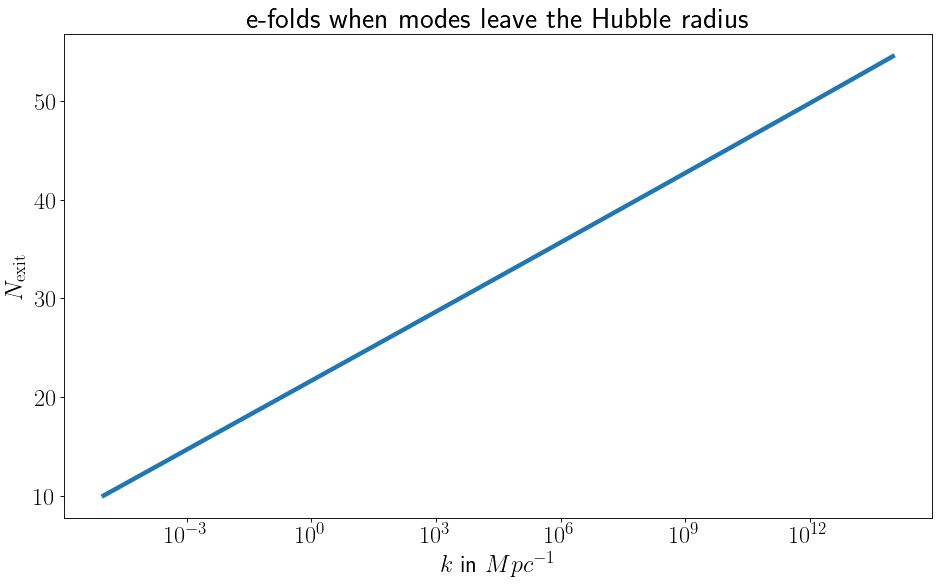

In [49]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'$N_\mathrm{exit}$')
plt.xscale('log')
plt.xlabel(r'$k$ in $Mpc^{-1}$')
plt.title(r'e-folds when modes leave the Hubble radius')
plt.plot(karray,exit_efold, lw=4,label='Scalar power spectrum')
plt.show()

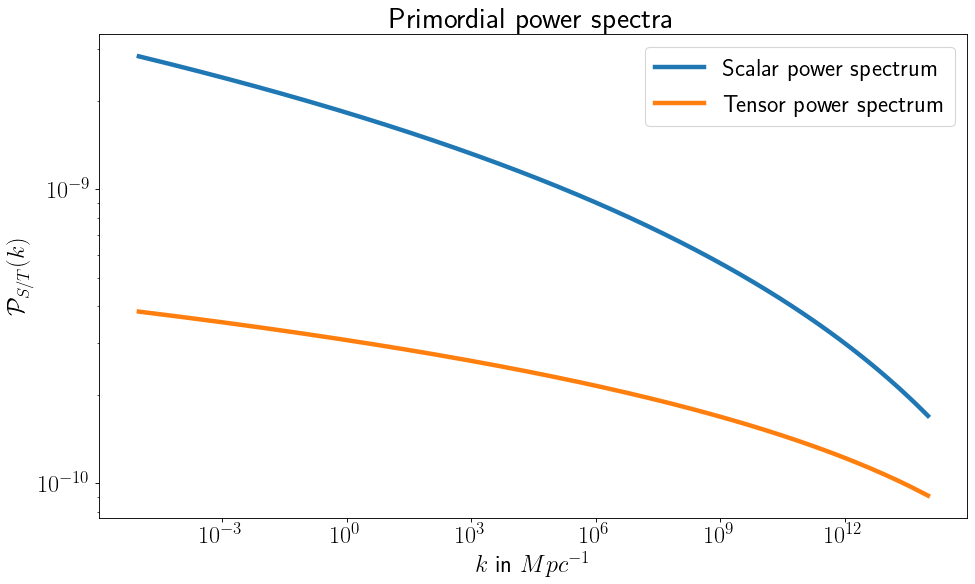

In [50]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'${\cal P}_{S/T}(k)$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ in $Mpc^{-1}$')
plt.title(r'Primordial power spectra')
plt.plot(karray,PS, lw=4,label='Scalar power spectrum')
plt.plot(karray,PT, lw=4,label='Tensor power spectrum')
plt.legend()
plt.show()

**Can we see primordial black holes with this primordial power spectra ? We will discuss this in another notebook**

In [51]:
# Define slow roll approximation to the scalar and tensor power spectra at the Hubble exit
PSSR=np.zeros(numK)
PTSR=np.zeros(numK)

for i in range(len(karray)):
    idex=int(exit_array_pos[i])
    Hex=Hub[idex]
    dphiex=dphi[idex]
    PSSR[i],PTSR[i]=PSR(Hex,dphiex)     

## Compare spectra

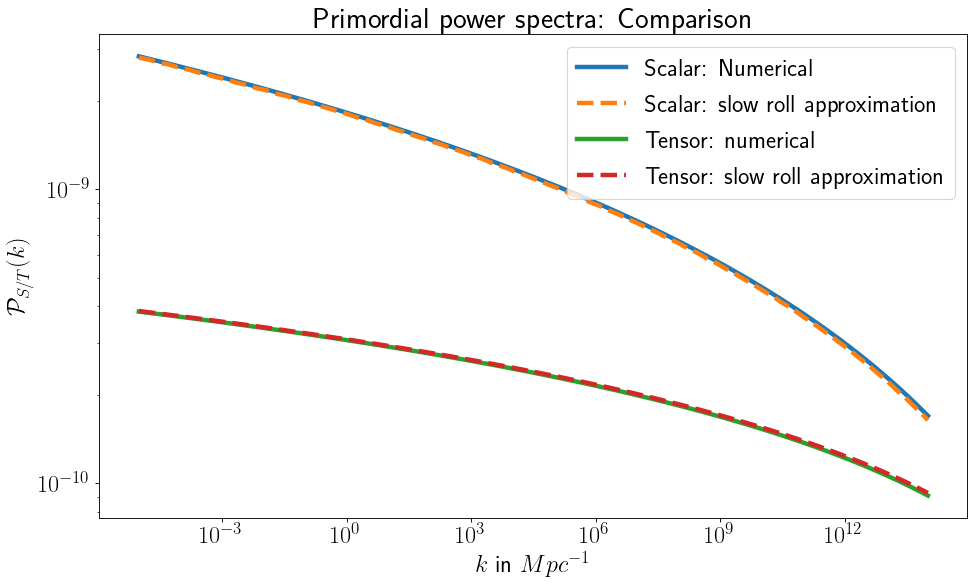

In [52]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel(r'${\cal P}_{S/T}(k)$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ in $Mpc^{-1}$')
plt.title(r'Primordial power spectra: Comparison')
plt.plot(karray,PS, lw=4,label='Scalar: Numerical')
plt.plot(karray,PSSR, lw=4,linestyle = '--',label='Scalar: slow roll approximation')
plt.plot(karray,PT, lw=4,label='Tensor: numerical')
plt.plot(karray,PTSR, lw=4,linestyle = '--',label='Tensor: slow roll approximation')
plt.legend()
plt.show()

**Note that for models with strict slow roll, the slow roll approximation to the scalar and tensor spectra match the numerically computed spectra very well.**

## Assignments 

1. Use Hilltop quartic model or $\alpha$-attractors and find the power spectra
2. Calculate the scalar power spectrum for a model with departures from slow roll, https://inspirehep.net/literature/343958
   Note that this code computes the spectra without any approximation, therefore, the solution can be treated as exact. For one such model with departures from slow roll, compare the numerical spectra with the slow roll approximation.

### Acknowlegements

I would like to thank L. Sriramkumar for his suggestions. I also thank Ivan Debono for designing the wrapper for _solve_ivp_. 